## Avaliando [Crash Course](https://mxnet.apache.org/versions/master/api/python/docs/tutorials/getting-started/crash-course/5-datasets.html)

In [1]:
import mxnet as mx
import os
import time
import tarfile


In [2]:
mx.np.random.seed(42)
X=mx.np.random.uniform(size=(10,3))
y=mx.np.random.uniform(size=(10,1))
dataset=mx.gluon.data.dataset.ArrayDataset(X,y)

In [3]:
sample_idx=4
sample=dataset[sample_idx]

assert len(sample)==2
assert sample[0].shape==(3,)
assert sample[1].shape==(1,)
print(sample)

(array([0.74707687, 0.37641123, 0.46362457]), array([0.35440788]))


[11:49:07] /home/mertins/Desenvolvimento/C/Terceiros/mxnet/src/storage/storage.cc:202: Using Pooled (Naive) StorageManager for CPU


In [4]:
from multiprocessing import cpu_count

CPU_COUNT=cpu_count()

data_loader=mx.gluon.data.DataLoader(dataset,batch_size=5,num_workers=CPU_COUNT)

for X_batch,y_batch in data_loader:
    print("X_batch has shape {}, and y_batch has shape{}".format(X_batch.shape,y_batch.shape))

X_batch has shape (5, 3), and y_batch has shape(5, 1)
X_batch has shape (5, 3), and y_batch has shape(5, 1)


In [6]:
def transform(data,label):
    data=data.astype('float')/255
    return data,label

train_dataset=mx.gluon.data.vision.datasets.FashionMNIST(train=True).transform(transform)
valid_dataset=mx.gluon.data.vision.datasets.FashionMNIST(train=False).transform(transform)

Data type: float64
Label; 8
Label description: Bag


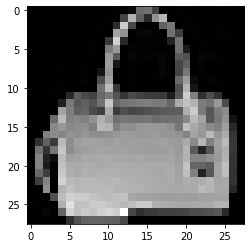

In [16]:
from matplotlib.pylab import imshow

sample_idx = 234
sample=train_dataset[sample_idx]
data=sample[0]
label=sample[1]
label_desc={0:'T-shirt/top',1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot'}

print("Data type: {}".format(data.dtype))
print("Label; {}".format(label))
print("Label description: {}".format(label_desc[label.item()]))
imshow(data[:,:,0].asnumpy(),cmap='gray')